In [1]:
import os

In [2]:
dir_path = os.getcwd()
data_folder_path = os.path.join(dir_path, "2024_11_data_7_eleven/road_info")

In [3]:
data_file_list = os.listdir(data_folder_path)
data_path_list = []
for file in data_file_list:
    data_path = os.path.join(data_folder_path, file)
    data_path_list.append(data_path)
data_path_list[:3]

['/home/thanatorn/coding/cro_location_intelligence/notebook/2024_11_data_7_eleven/road_info/1025.pkl']

In [4]:
sample_data_path = data_path_list[0]
# load sample data with pickle
import pickle

with open(sample_data_path, "rb") as f:
    sample_data = pickle.load(f)

sample_data

,geometry,road_length,road_length_service,road_length_residential,road_length_path,road_length_unclassified,road_length_footway,road_length_primary_link,road_length_secondary,road_length_steps,...,road_length_construction,road_length_traffic_signals,road_length_raceway,road_length_cycleway,road_length_pedestrian,road_length_road,road_length_track,grid_lat_id,grid_lon_id,store_id
0,"POLYGON ((11193993 1553720, 11193993 1553220, ...",7284.961292,2417.337169,4315.205192,10.219674,397.86595,144.333307,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,1025
1,"POLYGON ((11193993 1554220, 11193993 1553720, ...",4095.024821,352.244350,3742.780471,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,1.0,0.0,1025
2,"POLYGON ((11193993 1554720, 11193993 1554220, ...",6614.399034,1625.892014,2556.117067,0.000000,0.00000,31.513412,2136.010657,246.950937,17.914947,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,2.0,0.0,1025
3,"POLYGON ((11193993 1555220, 11193993 1554720, ...",8770.282615,2759.760735,1146.578198,0.000000,0.00000,79.803067,2067.125976,0.000000,32.798580,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,3.0,0.0,1025
4,"POLYGON ((11193993 1555720, 11193993 1555220, ...",7120.322072,1131.798681,2135.657496,0.000000,0.00000,324.767402,177.321165,396.310963,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,4.0,0.0,1025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"POLYGON ((11198493 1556220, 11198493 1555720, ...",7198.601867,97.999536,4919.551101,0.000000,0.00000,82.085415,278.604235,724.445960,18.033550,...,0.0,1.568274,0.0,0.000000,0.0,0.0,0.000000,5.0,9.0,1025
96,"POLYGON ((11198493 1556720, 11198493 1556220, ...",5095.508175,1042.731006,2896.792684,0.000000,0.00000,0.000000,0.000000,119.291807,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,6.0,9.0,1025
97,"POLYGON ((11198493 1557220, 11198493 1556720, ...",3888.937869,3816.716137,72.221732,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,7.0,9.0,1025
98,"POLYGON ((11198493 1557720, 11198493 1557220, ...",4542.160208,3805.753653,0.000000,28.181523,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,708.225032,0.0,0.0,0.000000,8.0,9.0,1025


In [5]:
sample_data.grid_lat_id.value_counts()

grid_lat_id
0.0    10
1.0    10
2.0    10
3.0    10
4.0    10
5.0    10
6.0    10
7.0    10
8.0    10
9.0    10
Name: count, dtype: int64

In [6]:
sample_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   geometry                       100 non-null    geometry
 1   road_length                    100 non-null    float64 
 2   road_length_service            100 non-null    float64 
 3   road_length_residential        100 non-null    float64 
 4   road_length_path               100 non-null    float64 
 5   road_length_unclassified       100 non-null    float64 
 6   road_length_footway            100 non-null    float64 
 7   road_length_primary_link       100 non-null    float64 
 8   road_length_secondary          100 non-null    float64 
 9   road_length_steps              100 non-null    float64 
 10  road_length_bus_stop           100 non-null    float64 
 11  road_length_primary            100 non-null    float64 
 12  road_length_motorway_link    

In [5]:
# from pymgl import Map

# # Define map style and center
# map_style = "https://tiles.openfreemap.org/styles/liberty"
# center = [13.388, 52.517]
# zoom = 9.5

# # Create a Map object
# map = Map(style=map_style, center=center, zoom=zoom)

# # Render the map to a PNG image
# image_data = map.render()

# # Process the image data (e.g., using OpenCV)
# # ...

In [19]:
from matplotlib.pyplot import grid
from geo_utils import (
    get_features_from_lat_lon,
    get_bbox_polygon_from_lat_lon,
    tags_dict,
    latlon_crs,
    meter_crs,
)
from geo_save_road_info import (
    buffer_road_metre,
    grid_points_from_bbox,
)

lat = 13.838724
lon = 100.575318
dist = 2500
grid_size = 500
drive_data = get_features_from_lat_lon(lat, lon, dist, tags_dict["highway"])
# drive_data = get_features_from_lat_lon(lat, lon, dist, tags_dict["building"])

# buffer road with 1 meter wide
drive_data = drive_data.to_crs(meter_crs)
drive_data

bbox (100.54058529574526, 13.804999487419016, 100.61005070425473, 13.872448512580982)


geometry  \
element id                                                              
node    85753778                     POINT (11194840.406 1557449.316)   
        105838423                     POINT (11196008.303 1555823.17)   
        359063003                    POINT (11192929.896 1552111.075)   
        360175676                    POINT (11194116.518 1556033.275)   
        360258134                     POINT (11196075.73 1555877.296)   
...                                                               ...   
way     1329837886  LINESTRING (11196991.266 1555721.937, 11197071...   
        1329837887  LINESTRING (11197041.359 1555777.873, 11197030...   
        1329845449  LINESTRING (11197045.946 1553606.833, 11197047...   
        1330586530  LINESTRING (11194035.744 1559276.839, 11194035...   
        1331311812  LINESTRING (11195539.548 1552139.538, 11195565...   

                              highway noref     ref crossing name name:en  \
element id                                                                  
node    85753778    motorway_junction   yes     NaN      NaN  NaN     NaN   
        105838423     traffic_signals   NaN     NaN      NaN  NaN     NaN   
        359063003   motorway_junction   NaN  น.2-07      NaN  NaN     NaN   
        360175676   motorway_junction   NaN  กม. 13      NaN  NaN     NaN   
        360258134            crossing   NaN     NaN    zebra  NaN     NaN   
...                               ...   ...     ...      ...  ...     ...   
way     1329837886            service   NaN     NaN      NaN  NaN     NaN   
        1329837887            service   NaN     NaN      NaN  NaN     NaN   
        1329845449        residential   NaN     NaN      NaN  NaN     NaN   
        1330586530            service   NaN     NaN      NaN  NaN     NaN   
        1331311812            service   NaN     NaN      NaN  NaN     NaN   

                   name:th traffic_signals bench  ... shoulder  \
element id                                        ...            
node    85753778       NaN             NaN   NaN  ...      NaN   
        105838423      NaN             NaN   NaN  ...      NaN   
        359063003      NaN             NaN   NaN  ...      NaN   
        360175676      NaN             NaN   NaN  ...      NaN   
        360258134      NaN             NaN   NaN  ...      NaN   
...                    ...             ...   ...  ...      ...   
way     1329837886     NaN             NaN   NaN  ...      NaN   
        1329837887     NaN             NaN   NaN  ...      NaN   
        1329845449     NaN             NaN   NaN  ...      NaN   
        1330586530     NaN             NaN   NaN  ...      NaN   
        1331311812     NaN             NaN   NaN  ...      NaN   

                   traffic_calming parking:lane:left  \
element id                                             
node    85753778               NaN               NaN   
        105838423              NaN               NaN   
        359063003              NaN               NaN   
        360175676              NaN               NaN   
        360258134              NaN               NaN   
...                            ...               ...   
way     1329837886             NaN               NaN   
        1329837887             NaN               NaN   
        1329845449             NaN               NaN   
        1330586530             NaN               NaN   
        1331311812             NaN               NaN   

                   parking:lane:left:parallel informal source:date indoor  \
element id                                                                  
node    85753778                          NaN      NaN         NaN    NaN   
        105838423                         NaN      NaN         NaN    NaN   
        359063003                         NaN      NaN         NaN    NaN   
        360175676                         NaN      NaN         NaN    NaN   
        360258134                         NaN      NaN     

In [20]:
# loop drive_data each rows
from collections import Counter

counter = Counter(drive_data.geometry.type)
counter

Counter({'LineString': 10584, 'Point': 337, 'Polygon': 12})

In [21]:
buffer_drive_data = buffer_road_metre(drive_data, road_size=1)

counter = Counter(buffer_drive_data.geometry.type)
counter

Counter({'Polygon': 10933})

In [24]:
import geopandas as gpd


def select_only_polygon(building_data: gpd.GeoDataFrame) -> gpd.GeoDataFrame:
    print("before")
    print(Counter(building_data.geometry.type))
    building_data = building_data[building_data["geometry"].type == "Polygon"]
    print("after")
    print(Counter(building_data.geometry.type))
    return building_data


building_data = get_features_from_lat_lon(lat, lon, dist, tags_dict["building"])

counter = Counter(building_data.geometry.type)

building_data = building_data.to_crs(meter_crs)

building_data = select_only_polygon(building_data)
counter = Counter(building_data.geometry.type)
counter

bbox (100.54058529574526, 13.804999487419016, 100.61005070425473, 13.872448512580982)
before
Counter({'Polygon': 5367, 'Point': 71})
after
Counter({'Polygon': 5367})


Counter({'Polygon': 5367})

In [37]:
from matplotlib.pyplot import grid
from geo_utils import (
    get_features_from_lat_lon,
    get_bbox_polygon_from_lat_lon,
    tags_dict,
    latlon_crs,
    meter_crs,
)
from geo_save_road_info import (
    buffer_road_metre,
    grid_points_from_bbox,
)

import geopandas as gpd


# def get_road_info_from_lat_lon(lat, lon, dist, grid_size=100) -> gpd.GeoDataFrame:
lat = 13.838724
lon = 100.575318
dist = 2500
grid_size = 500


# get road info from lat lon
def get_building_info_from_lat_lon(lat, lon, dist, grid_size=100) -> gpd.GeoDataFrame:

    building_data = get_features_from_lat_lon(lat, lon, dist, tags_dict["building"])

    # buffer road with 1 meter wide
    building_data = building_data.to_crs(meter_crs)
    building_data = select_only_polygon(building_data)
    # create a coverage polygon to create grid
    bbox_polygon = get_bbox_polygon_from_lat_lon(lat, lon, dist)
    polygon_gdf_latlon = gpd.GeoDataFrame(
        {"geometry": bbox_polygon}, index=[0], crs=latlon_crs
    )
    # convert to meter
    polygon_gdf = polygon_gdf_latlon.to_crs(meter_crs)
    bbox = polygon_gdf.total_bounds
    # create grid points
    grid_points = grid_points_from_bbox(bbox, spacing=grid_size, cover_size=dist * 2)
    grid_gdf = gpd.GeoDataFrame(geometry=grid_points, crs=meter_crs)

    # buffer grid points to make small square over the grid points
    buffered_grid_gdf = grid_gdf
    buffered_grid_gdf["geometry"] = buffered_grid_gdf["geometry"].buffer(
        grid_size / 2, cap_style=3
    )
    buffered_grid_gdf["grid_id"] = buffered_grid_gdf.index

    # get intersection between grid and road to extract each kinds of road area
    intersection_gdf = gpd.overlay(buffered_grid_gdf, building_data, how="intersection")
    # print(intersection_gdf.__dict__)
    # print(intersection_gdf.building.unique())
    # raise
    buffered_grid_gdf["building_area"] = 0.0
    for key in intersection_gdf.building.unique():
        buffered_grid_gdf["building_area_" + key] = 0.0
    for index, row in intersection_gdf.iterrows():
        grid_id = row["grid_id"]
        building_type = row["building"]

        # print(type(building_type))

        area = row["geometry"].area
        # print(type(area))
        # print("building_type", building_type)
        buffered_grid_gdf.loc[grid_id, "building_area_" + building_type] += area
    for index in buffered_grid_gdf.index:
        grid_id = index
        grid_number_one_side = dist * 2 // grid_size
        grid_lat_id = int(grid_id % grid_number_one_side)
        grid_lon_id = int(grid_id // grid_number_one_side)
        buffered_grid_gdf.loc[grid_id, "grid_lat_id"] = grid_lat_id
        buffered_grid_gdf.loc[grid_id, "grid_lon_id"] = grid_lon_id
    # sum road length
    for key in intersection_gdf.building.unique():
        buffered_grid_gdf["building_area"] += buffered_grid_gdf["building_area_" + key]
    # drop grid_id
    buffered_grid_gdf = buffered_grid_gdf.drop(columns=["grid_id"])

    return buffered_grid_gdf

In [39]:
buffered_grid_gdf = get_building_info_from_lat_lon(lat, lon, dist, grid_size=500)
buffered_grid_gdf

bbox (100.54058529574526, 13.804999487419016, 100.61005070425473, 13.872448512580982)
before
Counter({'Polygon': 5367, 'Point': 71})
after
Counter({'Polygon': 5367})
bbox (100.55216286383018, 13.816240991612677, 100.59847313616982, 13.861207008387321)


,geometry,building_area,building_area_office,building_area_yes,building_area_train_station,building_area_hospital,building_area_retail,building_area_public,building_area_roof,building_area_school,...,building_area_civic,building_area_farm,building_area_greenhouse,building_area_commercial,building_area_stilt_house,building_area_kindergarten,building_area_industrial,building_area_warehouse,grid_lat_id,grid_lon_id
0,"POLYGON ((11193993 1553720, 11193993 1553220, ...",39083.176372,3004.777265,36078.399107,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"POLYGON ((11193993 1554220, 11193993 1553720, ...",6577.962751,0.000000,6577.962751,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,"POLYGON ((11193993 1554720, 11193993 1554220, ...",8638.533549,0.000000,8638.533549,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
3,"POLYGON ((11193993 1555220, 11193993 1554720, ...",18208.101397,0.000000,18208.101397,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
4,"POLYGON ((11193993 1555720, 11193993 1555220, ...",41081.591410,0.000000,41081.591410,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"POLYGON ((11198493 1556220, 11198493 1555720, ...",0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,9.0
96,"POLYGON ((11198493 1556720, 11198493 1556220, ...",0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,9.0
97,"POLYGON ((11198493 1557220, 11198493 1556720, ...",0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,9.0
98,"POLYGON ((11198493 1557720, 11198493 1557220, ...",0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,9.0


1200.0
bbox (100.6691876452798, 13.635813155974084, 100.6913983547202, 13.657396844025914)
bbox (100.66363496791969, 13.630417233961127, 100.69695103208032, 13.662792766038871)
bbox (100.66363496791969, 13.630417233961127, 100.69695103208032, 13.662792766038871)
plot_bbox (np.float64(13.635813155974084), np.float64(100.6691876452798), np.float64(13.657396844025914), np.float64(100.6913983547202))


/home/thanatorn/coding/cro_location_intelligence/notebook/geo_utils.py:32: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["geometry"] = gdf.geometry.buffer(radius)


ValueError: aspect must be finite and positive 

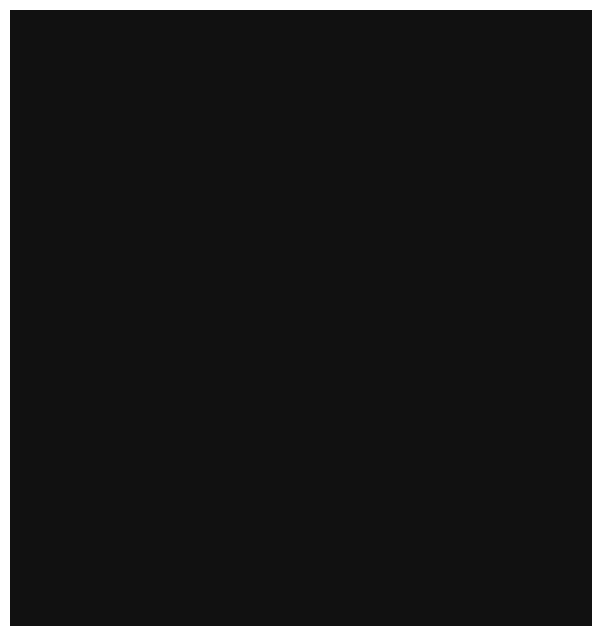

In [7]:
from geo_utils import get_cover_radius_size, create_full_image_from_lat_lon

cover_dist = get_cover_radius_size(dist)
print(cover_dist)
fig, ax = create_full_image_from_lat_lon(lat, lon, cover_dist, edge_linewidth, dpi)

In [8]:
from geo_utils import get_features_from_lat_lon

tags_dict = {
    "building": {"building": True},
    "highway": {"highway": True},
    "amenity": {"amenity": True},
    "landuse": {"landuse": True},
}

building_data = get_features_from_lat_lon(lat, lon, dist, tags_dict["building"])

bbox (100.6691876452798, 13.635813155974084, 100.6913983547202, 13.657396844025914)


In [9]:
import osmnx as ox

distance = 800
print(lat, lon)
bbox: tuple = ox.utils_geo.bbox_from_point((lat, lon), dist=distance)
print(type(bbox))
# bbox convert to float
bbox = tuple(map(float, bbox))
print("bbox", bbox)

13.646605 100.680293
<class 'tuple'>
bbox (100.67288943018653, 13.639410437316057, 100.68769656981348, 13.653799562683941)


In [10]:
building_data.columns

Index(['geometry', 'addr:postcode', 'alt_name', 'branch', 'brand',
       'brand:wikidata', 'building', 'name', 'opening_hours', 'phone', 'shop',
       'website', 'building:levels', 'diet:halal', 'diet:kosher', 'layer',
       'nohousenumber', 'roof:levels', 'wheelchair', 'brand:wikipedia',
       'addr:city', 'addr:housenumber', 'addr:street', 'changing_table',
       'check_date', 'internet_access', 'internet_access:fee', 'name:th',
       'toilets', 'toilets:wheelchair', 'wikidata', 'brand:th', 'operator',
       'operator:en', 'operator:th', 'operator:wikidata', 'operator:zh',
       'access', 'amenity', 'construction', 'fee', 'operator:type', 'parking',
       'opening_hours:signed', 'name:en', 'email', 'cuisine', 'house'],
      dtype='object')

In [11]:
from geo_utils import preprocess_features

processed_building_data = preprocess_features(
    building_data,
    tags=tags_dict["building"],
)
# remove point
processed_building_data = processed_building_data[
    processed_building_data["geometry"].type != "Point"
]

In [12]:
from geo_utils import (
    get_rgb_from_color_name,
)

building_config = {
    "=1": {"color_density_level": 1, "color": "green"},
    "=2": {"color_density_level": 2, "color": "green"},
    "=3": {"color_density_level": 3, "color": "green"},
    "=4": {"color_density_level": 4, "color": "green"},
    ">4": {"color_density_level": 5, "color": "green"},
}


def draw_building(processed_building_data, ax, edge_linewidth, plot_bbox, dpi):
    fig = None
    edge_color = get_rgb_from_color_name("green")
    edge_color = [int(rgb) for rgb in edge_color]
    edge_color = "#{:02x}{:02x}{:02x}".format(*edge_color)
    for floor_condition, config in building_config.items():
        expression = floor_condition[0]
        expression_value = int(floor_condition[1:])

        rgb_tuple = get_rgb_from_color_name(config["color"])
        rgb_tuple = [int(rgb / 255 * config["color_density"]) for rgb in rgb_tuple]
        hex_color = "#{:02x}{:02x}{:02x}".format(*rgb_tuple)
        if expression == "=":
            selected_data = processed_building_data[
                processed_building_data["building:levels"] == expression_value
            ]
        elif expression == ">":
            selected_data = processed_building_data[
                processed_building_data["building:levels"] > expression_value
            ]
        elif expression == "<":
            selected_data = processed_building_data[
                processed_building_data["building:levels"] < expression_value
            ]
        else:
            raise f"Expression {expression} is not supported"
        if selected_data.shape[0] == 0:
            continue
        # print("selected_data", selected_data.shape)
        fig, ax = ox.plot_footprints(
            selected_data,
            ax=ax,
            alpha=0.4,
            edge_linewidth=edge_linewidth,
            edge_color=edge_color,
            show=False,
            color=hex_color,
            bbox=plot_bbox,
            dpi=dpi,
        )
    return fig, ax